In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the final processed data
df = pd.read_csv("https://raw.githubusercontent.com/dafarizkiyanto/dataset-pln-mobile/main/VALID_DATA.csv")

# Extract the text data
texts = df['stemmed_tokenized'].tolist()

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Save the TF-IDF DataFrame to a CSV file
tfidf_df.to_csv('tfidf_corpus.csv', index=False)

# Save the vocabulary for later use
with open('tfidf_vocabulary.txt', 'w') as f:
    for word in vectorizer.get_feature_names_out():
        f.write(word + '\n')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the precomputed TF-IDF corpus
tfidf_df = pd.read_csv('tfidf_corpus.csv')

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dafarizkiyanto/dataset-pln-mobile/main/VALID_DATA.csv")
df.drop(columns = ['Ulasan','cleaned_text','stopword_removal','tanpa_stemming','stemmed','token_tanpa_stemming'],inplace = True)
df.columns = ['Sentimen','Ulasan']
df.head()

,Sentimen,Ulasan
0,Positif,"['responsif', 'tanggap', 'lapor', 'kendala', '..."
1,Positif,"['aplikasi', 'bagus', 'cek', 'tagih', 'listrik..."
2,Positif,"['pln', 'mobile', 'urus', 'listrik', 'mudah', ..."
3,Positif,"['aplikasi', 'pln', 'mobile', 'bagus', 'bantu']"
4,Positif,"['fitur', 'beli', 'token', 'adu', 'lumayan', '..."


In [6]:
df

,Sentimen,Ulasan
0,Positif,"['responsif', 'tanggap', 'lapor', 'kendala', '..."
1,Positif,"['aplikasi', 'bagus', 'cek', 'tagih', 'listrik..."
2,Positif,"['pln', 'mobile', 'urus', 'listrik', 'mudah', ..."
3,Positif,"['aplikasi', 'pln', 'mobile', 'bagus', 'bantu']"
4,Positif,"['fitur', 'beli', 'token', 'adu', 'lumayan', '..."
...,...,...
1370,Positif,"['fasilitas', 'bayar', 'beli', 'pulsa', 'mudah..."
1371,Negatif,"['aju', 'adu', 'input', 'no', 'id', 'baca']"
1372,Positif,"['transaksi', 'beli', 'token', 'mudah', 'cepat..."
1373,Positif,"['bantu', 'saat', 'darurat', 'moga', 'bantu', ..."


In [7]:
# Rename columns for clarity
df.columns = ['Sentimen', 'Ulasan']
df['Sentimen'] = df['Sentimen'].apply(lambda x: 1 if x == 'Positif' else 0)  # Convert Sentimen to binary

# Ensure the TF-IDF matrix matches the labels

In [8]:
assert len(tfidf_df) == len(df), "Mismatch between TF-IDF corpus and labels"

In [9]:
# Extract features and labels
X = tfidf_df
y = df['Sentimen']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# **RANDOM FOREST HYPERPARAMETER**

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Top 5 results:
                                               params  mean_test_score
35  {'criterion': 'gini', 'max_depth': None, 'max_...         0.941818
70  {'criterion': 'entropy', 'max_depth': None, 'm...         0.941818
71  {'criterion': 'entropy', 'max_depth': None, 'm...         0.940000
25  {'criterion': 'gini', 'max_depth': 30, 'max_fe...         0.936364
33  {'criterion': 'gini', 'max_depth': None, 'max_...         0.936364

Confusion Matrices for Top 5 Models:

Model 36 - Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
[[125  16]
 [  6 128]]


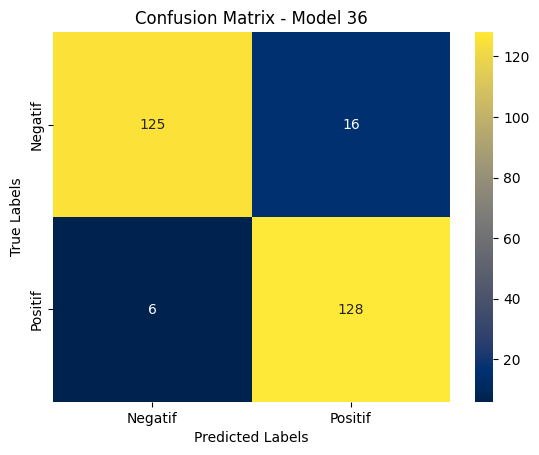


Model 71 - Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
[[127  14]
 [  5 129]]


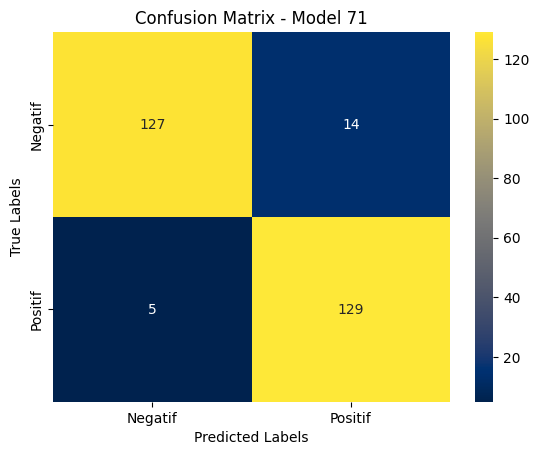


Model 72 - Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
[[127  14]
 [  6 128]]


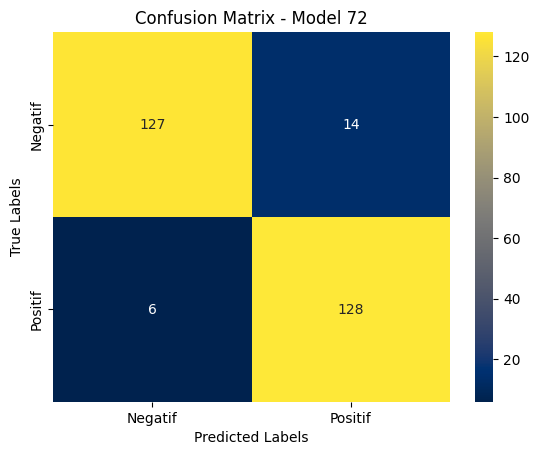

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

# Instantiate the grid search with the Random Forest classifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=3),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the top 5 results
cv_results = pd.DataFrame(grid_search.cv_results_)
top_5_results = cv_results.nlargest(5, 'mean_test_score')

# Print the top 5 results
print("Top 5 results:")
print(top_5_results[['params', 'mean_test_score']])

# Generate confusion matrices for the top 5 models
print("\nConfusion Matrices for Top 5 Models:")
for i, row in top_5_results.iterrows():
    # Retrieve the parameters of the i-th best model
    params = row['params']
    # Instantiate a new model with these parameters
    model = RandomForestClassifier(random_state=3, **params)
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nModel {i+1} - Params: {params}")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - Model {i+1}")
    plt.show()

# Use the best estimator found by grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred_best = best_classifier.predict(X_test)

# Evaluate the best classifier
print("\nRandom Forest Performance with Best Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix for the best classifier
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Best Classifier")
plt.show()


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, None],
#     'criterion': ['gini', 'entropy']
# }

# # Instantiate the grid search with the Random Forest classifier
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=3),
#                            param_grid=param_grid,
#                            cv=5,
#                            n_jobs=-1,
#                            verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Extract the top 5 results
# top_results = pd.DataFrame(grid_search.cv_results_).nlargest(5, 'mean_test_score')

# # Print the top 5 results
# print("Top 5 results:")
# print(top_results[['params', 'mean_test_score']])

# # Use the best estimator found by grid search
# best_classifier = grid_search.best_estimator_

# # Make predictions on the test set using the best classifier
# y_pred_best = best_classifier.predict(X_test)

# # Evaluate the best classifier
# print("\nRandom Forest Performance with Best Hyperparameters:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best))
# print(classification_report(y_test, y_pred_best))

# # Plot confusion matrix for the best classifier
# cm_best = confusion_matrix(y_test, y_pred_best)
# sns.heatmap(cm_best, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix - Best Classifier")
# plt.show()

In [ ]:
columns_of_interest = ['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_criterion', 'mean_test_score']
top_results = results.sort_values(by='mean_test_score', ascending=False)[columns_of_interest].head(5)

# Display the top 5 results
print("Top 5 Results:")
print(top_results)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, None],
#     'criterion': ['gini', 'entropy']
# }

# # Instantiate the grid search with the Random Forest classifier
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=3),
#                            param_grid=param_grid,
#                            cv=5,
#                            n_jobs=-1,
#                            verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Use the best estimator found by grid search
# best_classifier = grid_search.best_estimator_

# # Make predictions on the test set using the best classifier
# y_pred_best = best_classifier.predict(X_test)

# # Evaluate the best classifier
# print("Random Forest Performance with Hyperparameter Tuning:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best))
# print(classification_report(y_test, y_pred_best))

# # Plot confusion matrix for the best classifier
# cm_best = confusion_matrix(y_test, y_pred_best)
# sns.heatmap(cm_best, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix - Best Classifier")
# plt.show()


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
columns_of_interest = ['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_criterion', 'mean_test_score']
top_results = results.sort_values(by='mean_test_score', ascending=False)[columns_of_interest].head(5)

# Display the top 5 results
print("Top 5 Results:")
print(top_results)

In [ ]:
# Display the top 5 results
print("Top 5 Results:")
print(top_results)


In [ ]:
# # Make predictions on the test set
# y_pred = classifier.predict(X_test)

In [ ]:
# # Evaluate the classifier
# print("Random Forest Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# print("Random Forest Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix")
# plt.show()
